<a href="https://colab.research.google.com/github/Kamalgar/collab/blob/master/chart_pattern_techincal_indi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance as yfinance
!pip install mplfinance

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.5 MB/s eta 0:00:00


In [2]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
import seaborn as sns

import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

from scipy import stats
from scipy.stats import zscore
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint

import datetime
from datetime import date, timedelta

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
import pandas as pd
import yfinance as yf
import datetime

# Downloading FTSE100 stocks data
aqr_stocks = yf.download(" AZN.L GSK.L SBIN.NS JIOFIN.NS AXS AZN.L  PANW", start=datetime.datetime(2010, 1, 1),
                             end=datetime.datetime(2020,1,1), group_by='tickers')

# Save DataFrame to a pickle file
aqr_stocks.to_pickle('aqr_stocks.pkl')


# Save DataFrame to a pickle file
aqr_stocks.to_pickle('aqr_stocks.pkl')


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  6 of 6 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JIOFIN.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 00:00:00 -> 2020-01-01 00:00:00) (Yahoo error = "Data doesn\'t exist for startDate = 1262284200, endDate = 1577817000")')


In [4]:

aqr_stocks.head()

Ticker            GSK.L                                                     \
Price              Open         High          Low        Close      Volume   
Date                                                                         
2010-01-04  1322.619311  1337.093140  1316.130843  1337.093140   5328769.0   
2010-01-05  1338.590729  1338.590729  1301.158138  1304.651733   7762557.0   
2010-01-06  1303.154674  1316.630457  1292.174437  1293.172607   6528508.0   
2010-01-07  1295.668035  1304.651809  1286.684260  1291.176147  11789537.0   
2010-01-08  1291.176098  1298.163531  1274.705685  1278.698486  13860905.0   

Ticker     JIOFIN.NS                           ... PANW                        \
Price           Open High Low Close Adj Close  ... Open High Low Close Volume   
Date                                           ...                              
2010-01-04       NaN  NaN NaN   NaN       NaN  ...  NaN  NaN NaN   NaN    NaN   
2010-01-05       NaN  NaN NaN   NaN       NaN  ...  NaN  NaN NaN   NaN    NaN   
2010-01-06       NaN  NaN NaN   NaN       NaN  ...  NaN  NaN NaN   NaN    NaN   
2010-01-07       NaN  NaN NaN   NaN       NaN  ...  NaN  NaN NaN   NaN    NaN   
2010-01-08       NaN  NaN NaN   NaN       NaN  ...  NaN  NaN NaN   NaN    NaN   

Ticker         SBIN.NS                                                  
Price             Open        High         Low       Close      Volume  
Date                                                                    
2010-01-04  191.127791  193.228096  191.127791  192.488785  11031470.0  
2010-01-05  193.900207  194.068229  191.556259  192.560211  11613740.0  
2010-01-06  192.976097  194.488319  191.967952  193.715408  14527930.0  
2010-01-07  193.732193  194.068237  191.640284  192.631622   8576510.0  
2010-01-08  192.724048  193.555774  191.556279  192.056152  10453820.0  

[5 rows x 31 columns]

In [5]:
azn =  aqr_stocks['AZN.L']

azn.head()

Price,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,2894.438804,2928.233763,2894.438804,2923.263916,2091679.0
2010-01-05,2918.293946,2931.712532,2883.505020,2889.965820,2869739.0
2010-01-06,2891.456823,2891.456823,2833.309616,2857.661865,3136541.0
2010-01-07,2861.637478,2907.857049,2861.637478,2892.947510,3748200.0
2010-01-08,2903.384088,2909.844888,2872.074058,2890.959473,2473846.0


# Visualising stock data

In [6]:
!pip install mpl_finance

In [7]:
def pandas_candlestick_ohlc(dat, stick="day", otherseries=None):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, date2num
    from mpl_finance import candlestick_ohlc  # Updated import
    import seaborn as sns

    mondays = WeekdayLocator(mdates.MONDAY)
    alldays = DayLocator()
    dayFormatter = DateFormatter('%d')

    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if isinstance(stick, str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat_list = []  # Initialize an empty list to store DataFrames
            for name, group in grouped:
                temp_df = pd.DataFrame({
                    "Open": group.iloc[0, 0],
                    "High": max(group.High),
                    "Low": min(group.Low),
                    "Close": group.iloc[-1, 3]
                }, index=[group.index[0]])
                plotdat_list.append(temp_df)

            plotdat = pd.concat(plotdat_list)  # Concatenate the list of DataFrames into a single DataFrame

            if stick == "week":
                stick = 5
            elif stick == "month":
                stick = 30
            elif stick == "year":
                stick = 365

    elif isinstance(stick, int) and stick >= 1:
        transdat["stick"] = np.floor(np.arange(len(transdat.index)) / stick)
        grouped = transdat.groupby("stick")
        plotdat_list = []  # Initialize an empty list to store DataFrames
        for name, group in grouped:
            temp_df = pd.DataFrame({
                "Open": group.iloc[0, 0],
                "High": max(group.High),
                "Low": min(group.Low),
                "Close": group.iloc[-1, 3]
            }, index=[group.index[0]])
            plotdat_list.append(temp_df)

        plotdat = pd.concat(plotdat_list)  # Concatenate the list of DataFrames into a single DataFrame

    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')


    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)

    ax.grid(True)

    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup="green", colordown="red", width=stick * 0.4)

    # Plot other series (such as moving averages) as lines
    if otherseries is not None:
        if isinstance(otherseries, str):
            otherseries = [otherseries]
        dat.loc[:, otherseries].plot(ax=ax, lw=1.3, grid=True)

    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    sns.set(rc={'figure.figsize':(20, 10)})
    plt.style.use('seaborn-whitegrid')
    plt.title(f"Candlestick chart of {txt}", color='black', fontsize=20)
    plt.xlabel('Date', color='black', fontsize=15)
    plt.ylabel('Stock Price (p)', color='black', fontsize=15)

    plt.show()

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

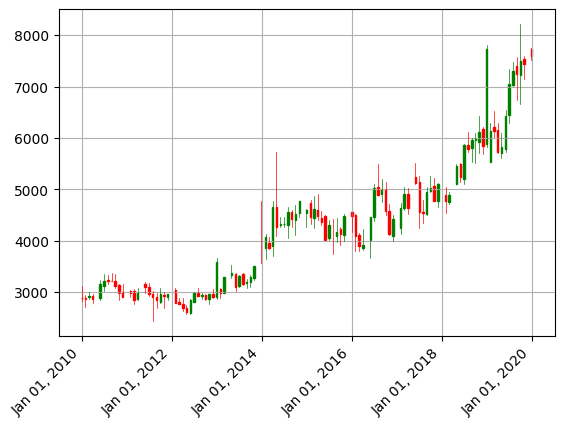

In [8]:
txt = "AZN.L OHLC stock prices from 01 Jan 2010 - 1 jan 2024"

pandas_candlestick_ohlc(azn, stick="month")

In [ ]:
txt = "AZN.L OHLC stock prices from 01 - 31 Oct 2019"

pandas_candlestick_ohlc(azn['2019-10-01':'2019-10-31'], stick="day")

# Technical Indicators

#Moving averages

In [ ]:
#  Simple Moving Average (SMA)

# def sma():
#   plt.figure(figsize=(15,9))
#   aqr_stocks[ticker]['Adj Close'].loc['2019-01-01':'2019-12-24'].rolling(window=20).mean().plot(label='20 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2019-01-01':'2019-12-24'].plot(label=f"{label_txt}")
#   plt.title(f"{title_txt}", color = 'black', fontsize = 20)
#   plt.xlabel('Date', color = 'black', fontsize = 15)
#   plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
#   plt.legend()

import matplotlib.pyplot as plt

def sma():
    plt.figure(figsize=(15,9))

    # Remove missing values before computing the moving average
    adj_close = aqr_stocks[ticker]['Adj Close'].loc['2019-01-01':'2019-12-24'].dropna()

    # Compute the 20-day simple moving average
    moving_avg = adj_close.rolling(window=20).mean()

    # Plot the 20-day moving average
    moving_avg.plot(label='20 Day Avg')

    # Plot the adjusted close prices after the moving average
    adj_close.plot(label=label_txt)

    plt.title(title_txt, color='black', fontsize=20)
    plt.xlabel('Date', color='black', fontsize=15)
    plt.ylabel('Stock Price (p)', color='black', fontsize=15)
    plt.legend()


In [ ]:
ticker = 'AZN.L'
title_txt = "20-day Simple Moving Average for AZN.L stock"
label_txt = "AZN.L Adj Close"

sma()

In [ ]:
#Moving Average Crossover Strategy

# def sma2():
#   plt.figure(figsize=(15,9))
#   aqr_stocks[ticker]['Adj Close'].loc['2010-01-01':'2019-12-24'].rolling(window=20).mean().plot(label='20 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2010-01-01':'2019-12-24'].rolling(window=50).mean().plot(label='50 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2010-01-01':'2019-12-24'].rolling(window=200).mean().plot(label='200 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2010-01-01':'2019-12-24'].plot(label=f"{label_txt}")
#   plt.title(f"{title_txt}", color = 'black', fontsize = 20)
#   plt.xlabel('Date', color = 'black', fontsize = 15)
#   plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
#   plt.legend()

import matplotlib.pyplot as plt

def sma2():
    plt.figure(figsize=(15,9))

    # Remove missing values before computing the moving averages
    adj_close = aqr_stocks[ticker]['Adj Close'].loc['2010-01-01':'2019-12-24'].dropna()

    # Compute the moving averages
    moving_avg_20d = adj_close.rolling(window=20).mean()
    moving_avg_50d = adj_close.rolling(window=50).mean()
    moving_avg_200d = adj_close.rolling(window=200).mean()

    # Plot the moving averages
    moving_avg_20d.plot(label='20 Day Avg')
    moving_avg_50d.plot(label='50 Day Avg')
    moving_avg_200d.plot(label='200 Day Avg')

    # Plot the adjusted close prices
    adj_close.plot(label=label_txt)

    plt.title(title_txt, color='black', fontsize=20)
    plt.xlabel('Date', color='black', fontsize=15)
    plt.ylabel('Stock Price (p)', color='black', fontsize=15)
    plt.legend()


In [ ]:
ticker = 'AZN.L'

title_txt = "20, 50 and 200 day moving averages for AZN.L stock"
label_txt = "AZN.L Adj Close"

sma2()


In [ ]:
# 20, 50 and 200 day MA repeated for GSK.L Adjusted Close price data for the same time period

ticker = 'GSK.L'

title_txt = "20, 50 and 200 day moving averages for GSK stock"
label_txt = "GSK Adj Close"

sma2()

In [ ]:
#Trading Strategy


azn_sma = azn.copy()
azn_sma.dropna(inplace=True)

In [ ]:
azn_sma

In [ ]:
# Calculate and add columns for moving averages of Adjusted Close price data

azn_sma["20d"] = np.round(azn_sma["Adj Close"].rolling(window=20, center=False).mean(), 2)
azn_sma["50d"] = np.round(azn_sma["Adj Close"].rolling(window=50, center=False).mean(), 2)
azn_sma["200d"] = np.round(azn_sma["Adj Close"].rolling(window=200, center=False).mean(), 2)


In [ ]:
azn_sma.tail()

In [ ]:
txt = "20, 50 and 200 day moving averages for AZN.L stock"

# Slice rows
pandas_candlestick_ohlc(azn_sma.loc['2010-01-01':'2019-12-31',:], otherseries = ["20d", "50d", "200d"])

In [ ]:
#Before using the strategy we will evaluate the quality of it first by backtesting, or looking at how profitable it is on historical data.

In [ ]:
azn_sma['20d-200d'] = azn_sma['20d'] - azn_sma['200d']
azn_sma.tail()

In [ ]:
azn_sma["Regime"] = np.where(azn_sma['20d-200d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Replace bearish regime's values with -1, and to maintain the rest of the vector, the second argument is azn_sma["Regime"]
azn_sma["Regime"] = np.where(azn_sma['20d-200d'] < 0, -1, azn_sma["Regime"])
azn_sma.loc['2016-01-01':'2019-12-22',"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2);
plt.title("Regime for AZN.L 20- and 200-day Moving Average Crossover Strategy for 2016-2019", color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Regime', color = 'black', fontsize = 15);

In [ ]:
azn_sma["Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2);
plt.title("Regime for AZN.L 20- and 200-day Moving Average Crossover Strategy for 2010-2019", color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Regime', color = 'black', fontsize = 15);

In [ ]:
# Number of bullish and bearish days

azn_sma["Regime"].value_counts()

In [ ]:
azn_sma

In [ ]:
regime_orig = azn_sma.iloc[-1, 10]
azn_sma.iloc[-1, 10] = 0
azn_sma["Signal"] = np.sign(azn_sma["Regime"] - azn_sma["Regime"].shift(1))
# Restore original regime data
azn_sma.iloc[-1, 10] = regime_orig
azn_sma.tail()

In [ ]:
azn_sma["Signal"].plot(ylim = (-2, 2));
plt.title("Trading signals for AZN.L 20- and 200-day Moving Average Crossover Strategy for 2010-2019", color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Trading signal', color = 'black', fontsize = 15);


In [ ]:
# Unique counts of trading signals

azn_sma["Signal"].value_counts()

In [ ]:
# Identify what the price of the stock is at every buy.

azn_sma.loc[azn_sma["Signal"] == 1, "Close"]

In [ ]:
# Identify what the price of the stock is at every sell.

azn_sma.loc[azn_sma["Signal"] == -1, "Close"]

In [ ]:
# Identify what the price of the stock is at every sell.

azn_sma.loc[azn_sma["Signal"] == -1, "Close"]

In [ ]:
# Create a dataframe with trades, including the price at the trade and the regime under which the trade is made.

azn_signals = pd.concat([
        pd.DataFrame({"Price": azn_sma.loc[azn_sma["Signal"] == 1, "Adj Close"],
                     "Regime": azn_sma.loc[azn_sma["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": azn_sma.loc[azn_sma["Signal"] == -1, "Adj Close"],
                     "Regime": azn_sma.loc[azn_sma["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
azn_signals.sort_index(inplace = True)
azn_signals


In [ ]:
# the profitability of long trades

azn_long_profits = pd.DataFrame({
        "Price": azn_signals.loc[(azn_signals["Signal"] == "Buy") &
                                  azn_signals["Regime"] == 1, "Price"],
        "Profit": pd.Series(azn_signals["Price"] - azn_signals["Price"].shift(1)).loc[
            azn_signals.loc[(azn_signals["Signal"].shift(1) == "Buy") & (azn_signals["Regime"].shift(1) == 1)].index
        ].tolist(),
        "End Date": azn_signals["Price"].loc[
            azn_signals.loc[(azn_signals["Signal"].shift(1) == "Buy") & (azn_signals["Regime"].shift(1) == 1)].index
        ].index
    })
azn_long_profits

### Exponential Moving Average

In [ ]:
# 20-day EMA for Adjusted Close price for 2019

# def ewma():
#   plt.figure(figsize=(15,9))
#   aqr_stocks[ticker]['Adj Close'].loc['2019-01-01':'2019-12-31'].ewm(20).mean().plot(label='20 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2019-01-01':'2019-12-31'].plot(label=f"{label_txt}")
#   plt.title(f"{title_txt}", color = 'black', fontsize = 20)
#   plt.xlabel('Date', color = 'black', fontsize = 15)
#   plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
#   plt.legend()
import matplotlib.pyplot as plt

def ewma():
    plt.figure(figsize=(15,9))

    # Remove missing values from adjusted close prices
    adj_close = aqr_stocks[ticker]['Adj Close'].loc['2019-01-01':'2019-12-31'].dropna()

    # Compute the EWMA for 20-day average
    ewma_20d = adj_close.ewm(span=20).mean()

    # Plot the 20-day EWMA
    ewma_20d.plot(label='20 Day Avg')

    # Plot the adjusted close prices
    adj_close.plot(label=label_txt)

    plt.title(title_txt, color='black', fontsize=20)
    plt.xlabel('Date', color='black', fontsize=15)
    plt.ylabel('Stock Price (p)', color='black', fontsize=15)
    plt.legend()



In [ ]:
ticker = 'AZN.L'
title_txt = "20-day Exponential Moving Average for AZN.L stock"
label_txt = "AZN.L Adj Close"

ewma()


In [ ]:
# 20-, 50- and 200-day EMA for Adjusted Close price for 2016-2019

# def ewma2():
#   plt.figure(figsize=(15,9))
#   aqr_stocks[ticker]['Adj Close'].loc['2016-01-01':'2019-12-31'].ewm(20).mean().plot(label='20 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2016-01-01':'2019-12-31'].ewm(50).mean().plot(label='50 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2016-01-01':'2019-12-31'].ewm(200).mean().plot(label='200 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2016-01-01':'2019-12-31'].plot(label=f"{label_txt}")
#   plt.title(f"{title_txt}", color = 'black', fontsize = 20)
#   plt.xlabel('Date', color = 'black', fontsize = 15)
#   plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
#   plt.legend()

import matplotlib.pyplot as plt

def ewma2():
    plt.figure(figsize=(15,9))

    # Remove missing values from adjusted close prices
    adj_close = aqr_stocks[ticker]['Adj Close'].loc['2016-01-01':'2019-12-31'].dropna()

    # Compute the EMAs for 20-day, 50-day, and 200-day averages
    ewma_20d = adj_close.ewm(span=20).mean()
    ewma_50d = adj_close.ewm(span=50).mean()
    ewma_200d = adj_close.ewm(span=200).mean()

    # Plot the EMAs for 20-day, 50-day, and 200-day averages
    ewma_20d.plot(label='20 Day Avg')
    ewma_50d.plot(label='50 Day Avg')
    ewma_200d.plot(label='200 Day Avg')

    # Plot the adjusted close prices
    adj_close.plot(label=label_txt)

    plt.title(title_txt, color='black', fontsize=20)
    plt.xlabel('Date', color='black', fontsize=15)
    plt.ylabel('Stock Price (p)', color='black', fontsize=15)
    plt.legend()


In [ ]:
ticker = 'AZN.L'
title_txt = "20, 50 and 200-day Exponential Moving Averages for AZN.L stock"
label_txt = "AZN.L Adj Close"

ewma2()

## Triple Moving Average Crossover Strategy

In [ ]:

 azn.dropna(inplace=True)
azn[['Adj Close']]['2019-05-01':'2019-10-31']

In [ ]:
def adj_6mo():
  sns.set(rc={'figure.figsize':(15, 9)})
  aqr_stocks[ticker]['Adj Close'].loc['2019-05-01':'2019-10-31'].dropna().plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

In [ ]:
ticker = 'AZN.L'
title_txt = "AZN.L Adjusted Close Price from 1 May - 31 Oct 2019"
label_txt = "AZN.L Adj Close "

adj_6mo()

In [ ]:
azn_adj_6mo = azn[['Adj Close']]['2019-05-01':'2019-10-31']

In [ ]:
ShortEMA = azn_adj_6mo['Adj Close'].ewm(span=5, adjust=False).mean()
MiddleEMA = azn_adj_6mo['Adj Close'].ewm(span=21, adjust=False).mean()
LongEMA = azn_adj_6mo['Adj Close'].ewm(span=63, adjust=False).mean()

In [ ]:
def ewma3():
  sns.set(rc={'figure.figsize':(15, 9)})
  plt.plot(aqr_stocks[ticker]['Adj Close'].loc['2019-05-01':'2019-10-31'].dropna(), label=f"{label_txt}", color = 'blue')
  plt.plot(ShortEMA, label = 'Short/Fast EMA', color = 'red')
  plt.plot(MiddleEMA, label = 'Middle/Medium EMA', color = 'orange')
  plt.plot(LongEMA, label = 'Long/Slow EMA', color = 'green')
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()


In [ ]:
ticker = 'AZN.L'
title_txt = "Triple Exponential Moving Average Crossover for AZN.L stock"
label_txt = "AZN.L Adj Close"

ewma3()

In [ ]:
azn_adj_6mo['Short'] = ShortEMA
azn_adj_6mo['Middle'] = MiddleEMA
azn_adj_6mo['Long'] = LongEMA


In [ ]:
azn_adj_6mo

In [ ]:
def buy_sell_ewma3(data):

  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Adj Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Adj Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Adj Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Adj Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  return (buy_list, sell_list)



In [ ]:
azn_adj_6mo['Buy'] = buy_sell_ewma3(azn_adj_6mo)[0]
azn_adj_6mo['Sell'] = buy_sell_ewma3(azn_adj_6mo)[1]


In [ ]:
def buy_sell_ewma3_plot():
  sns.set(rc={'figure.figsize':(18, 10)})
  plt.plot(aqr_stocks[ticker]['Adj Close'].loc['2019-05-01':'2019-10-31'].dropna(), label=f"{label_txt}", color = 'blue', alpha = 0.35)
  plt.plot(ShortEMA, label = 'Short/Fast EMA', color = 'red', alpha = 0.35)
  plt.plot(MiddleEMA, label = 'Middle/Medium EMA', color = 'orange', alpha = 0.35)
  plt.plot(LongEMA, label = 'Long/Slow EMA', color = 'green', alpha = 0.35)
  plt.scatter(azn_adj_6mo.index, azn_adj_6mo['Buy'], color = 'green', label = 'Buy Signal', marker = '^', alpha = 1)
  plt.scatter(azn_adj_6mo.index, azn_adj_6mo['Sell'], color = 'red', label = 'Buy Signal', marker='v', alpha = 1)
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()


In [ ]:
ticker = 'AZN.L'
title_txt = "Trading signals for AZN.L stock"
label_txt = "AZN.L Adj Close"

buy_sell_ewma3_plot()

#Exponential Smoothing

need to do

### Moving average convergence divergence (MACD)

In [ ]:
def adj_3mo():
  sns.set(rc={'figure.figsize':(15, 9)})
  aqr_stocks[ticker]['Adj Close'].loc['2019-08-01':'2019-10-31'].dropna().plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

In [ ]:
ticker = 'AZN.L'
title_txt = "AZN.L Adjusted Close Price from 1 Aug - 31 Oct 2019"
label_txt = "AZN.L Adj Close "

adj_3mo()

In [ ]:
azn_adj_3mo = azn[['Adj Close']]['2019-08-01':'2019-10-31']

In [ ]:
ShortEMA = azn_adj_3mo['Adj Close'].ewm(span=12, adjust=False).mean()
LongEMA = azn_adj_3mo['Adj Close'].ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()


In [ ]:
def macd():
  plt.figure(figsize=(15, 9))
  plt.plot(azn_adj_3mo.index, MACD, label = f"{macd_label_txt}", color= 'red')
  plt.plot(azn_adj_3mo.index, signal, label = f"{sig_label_txt}", color= 'blue')
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xticks (rotation = 45)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.legend(loc='upper left')
  plt.show()


In [ ]:
ticker = 'AZN.L'
title_txt = 'MACD and Signal line for AZN.L stock from 1 Aug - 31 Oct 2019'
macd_label_txt ="AZN.L MACD"
sig_label_txt = "Signal Line"

macd()

In [ ]:
# Create new columns for the MACD and Signal Line data

azn_adj_3mo['MACD'] = MACD
azn_adj_3mo['Signal Line'] = signal
azn_adj_3mo

In [ ]:
# Function to signal when to buy and sell

def buy_sell_macd(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Adj Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Adj Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)

In [ ]:
# Create buy and sell columns

a = buy_sell_macd(azn_adj_3mo)
azn_adj_3mo['Buy_Signal_Price'] = a[0]
azn_adj_3mo['Sell_Signal_Price'] = a[1]


azn_adj_3mo

In [ ]:
# Plot buy and sell signals

def buy_sell_macd_plot():
  plt.figure(figsize=(20, 10))
  plt.scatter(azn_adj_3mo.index, azn_adj_3mo['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
  plt.scatter(azn_adj_3mo.index, azn_adj_3mo['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
  plt.plot(azn_adj_3mo['Adj Close'], label='Adj Close Price', alpha = 0.35)
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Adj Close Price')
  plt.legend(loc = 'upper left')
  plt.show()

In [ ]:
ticker = 'AZN.L'
title_txt = 'AZN.L Adjusted Close Price Buy & Sell Signals'

buy_sell_macd_plot()

## 5.2 Momentum Strategies

In [ ]:
def adj_12mo():
  sns.set(rc={'figure.figsize':(15, 9)})
  aqr_stocks[ticker]['Adj Close'].loc['2019-01-01':'2019-12-31'].dropna().plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

In [ ]:
ticker = 'AZN.L'
title_txt = "AZN.L Adjusted Close Price from 1 Jan - 31 Dec 2019"
label_txt = "AZN.L Adj Close "

adj_12mo()

In [ ]:
azn_adj_12mo = azn[['Adj Close']]['2019-01-01':'2019-12-31']

In [ ]:

# Prepare the data to calculate the RSI
delta = azn_adj_12mo['Adj Close'].diff(1)
delta


In [ ]:
delta = delta.dropna()
delta

In [ ]:
# Get positive gains (up) and negative gains (down)
up = delta.copy()
down = delta.copy()

up[up < 0] = 0
down[down > 0] = 0


# Get time period

period = 14

In [ ]:
# Calculate average gain and average loss
AVG_Gain = up.rolling(window=period).mean()
#AVG_Loss = abs(down.rolling(window=period).mean())
AVG_Loss = down.abs().rolling(window=period).mean()

In [ ]:
# Calculate RSI based on SMA

# Calculate Relative Strength (RS)
RS = AVG_Gain / AVG_Loss
# Calculate RSI
RSI = 100.0 - (100.0 / (1.0 + RS))

In [ ]:
def rsi():
  sns.set(rc={'figure.figsize':(20, 10)})
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('RSI', color = 'black', fontsize = 15);
  RSI.plot()

In [ ]:
ticker = 'AZN.L'
title_txt = "AZN.L RSI plot for 1 Jan - 31 Dec 2019"
label_txt = "AZN.L RSI level"

rsi()

In [ ]:
new_df = pd.DataFrame()
new_df['Adj Close'] = azn_adj_12mo['Adj Close']
new_df['RSI'] = RSI
new_df


In [ ]:
# Plot corresponding RSI values and the significant levels

def rsi_sma():
  plt.figure(figsize=(20, 10))
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.plot(new_df.index, new_df['RSI'])
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.axhline(0, linestyle='--', alpha = 0.5, color='gray')
  plt.axhline(10, linestyle='--', alpha = 0.5, color='orange')
  plt.axhline(20, linestyle='--', alpha = 0.5, color='green')
  plt.axhline(30, linestyle='--', alpha = 0.5, color='red')
  plt.axhline(70, linestyle='--', alpha = 0.5, color='red')
  plt.axhline(80, linestyle='--', alpha = 0.5, color='green')
  plt.axhline(90, linestyle='--', alpha = 0.5, color='orange')
  plt.axhline(100, linestyle='--', alpha = 0.5, color='gray')
  plt.show()

In [ ]:
title_txt = 'AZN.L RSI based on SMA'

rsi_sma()


# Rate of Change (ROC)

In [ ]:
azn_roc = azn.copy()
azn_roc

In [ ]:
azn_roc_12mo = azn_roc['2019-01-01':'2019-12-31']
azn_roc_12mo

In [ ]:
azn_roc_12mo['ROC'] = ( azn_roc_12mo['Adj Close'] / azn_roc_12mo['Adj Close'].shift(9) -1 ) * 100
azn_roc_12mo[['Adj Close', 'ROC']]

In [ ]:
# selection of data - last 100 days

azn_roc_100d = azn_roc_12mo[-100:]
dates = azn_roc_100d.index
price = azn_roc_100d['Adj Close']
roc = azn_roc_100d['ROC']

In [ ]:
# Plot AZN.L Adj Close Price and 9-day ROC for last 100 days of 2019

fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0)

plt.rcParams.update({'font.size': 14})

In [ ]:
# Price subplot
price_ax = plt.subplot(2, 1, 1)
price_ax.plot(dates, price, color='blue', linewidth=2, label="Adj Closing Price")
price_ax.legend(loc="upper left", fontsize=12)
price_ax.set_ylabel("Price")
price_ax.set_title("AZN.L Daily Price", fontsize=24)

# ROC subplot
roc_ax = plt.subplot(2, 1, 2, sharex = price_ax)
roc_ax.plot(roc, color='k', linewidth = 1, alpha=0.7, label="9-Day ROC")
roc_ax.legend(loc="upper left", fontsize=12)
roc_ax.set_ylabel("% ROC")

# Adding a horizontal line at the zero level in the ROC subplot:
roc_ax.axhline(0, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)

# Filling the areas between the indicator and the level 0 line:
roc_ax.fill_between(dates, 0, roc, where = (roc >= 0), color='g', alpha=0.3, interpolate=True)
roc_ax.fill_between(dates, 0, roc, where = (roc  < 0), color='r', alpha=0.3, interpolate=True)

# Formatting the date labels
roc_ax.xaxis.set_major_formatter(DateFormatter('%b'))

# Formatting the labels on the y axis for ROC:
roc_ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())

# Adding a grid to both subplots:
price_ax.grid(b=True, linestyle='--', alpha=0.5)
roc_ax.grid(b=True, linestyle='--', alpha=0.5)

# Setting a background color for the both subplots:
price_ax.set_facecolor((.94,.95,.98))
roc_ax.set_facecolor((.98,.97,.93))

# Adding margins around the plots:
price_ax.margins(0.05, 0.2)
roc_ax.margins(0.05, 0.2)

# Hiding the tick marks from the horizontal and vertical axis:
price_ax.tick_params(left=False, bottom=False)
roc_ax.tick_params(left=False, bottom=False, labelrotation=45)

# Hiding all the spines for the price subplot:
for s in price_ax.spines.values():
    s.set_visible(False)
# Hiding all the spines for the ROC subplot:
for s in roc_ax.spines.values():
    s.set_visible(False)

# To better separate the two subplots, we reinstate a spine in between them
roc_ax.spines['top'].set_visible(True)
roc_ax.spines['top'].set_linewidth(1.5)

In [ ]:
# Candlestick and volume plot for same time frame

mpf.plot(azn_roc_100d, type='candle',  style='yahoo', figsize=(15,8),  title="AZN.L Daily Price", volume=True)


In [ ]:
# Combined Candlestick, ROC and Volume plot

# We create an additional plot planing it on the third panel
roc_plot = mpf.make_addplot(roc, panel=2, ylabel='ROC')

#We pass the additional plot using the addplot parameter
mpf.plot(azn_roc_100d, type='candle',  style='yahoo', figsize=(15,8), addplot=roc_plot, title="AZN.L 9-day ROC ", volume=True)


 # Volume Trading Strategies

In [ ]:
# Create copy of dataframe for AZN.L stock

azn_obv = azn.copy()
azn_obv

In [ ]:
# Create dataframe for slice of AZN.L stock for 6 months July - Dec 2019

azn_obv_6mo = azn_obv['2019-07-01':'2019-12-31']
azn_obv_6mo

In [ ]:
# Plot AZN.L Adjusted Close price for the time period

def obv_adj():
  plt.figure(figsize=(17, 8))
  plt.style.use('seaborn')
  plt.plot(azn_obv_6mo['Adj Close'], label = 'Adjusted Close')
  plt.title('AZN.L Adjusted Close Price for 6 months (1 Jul - 31 Dec 2019)', color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Price', color = 'black', fontsize = 15)
  plt.legend()
  plt.show()

obv_adj()

In [ ]:
# Calculate the OBV

OBV = []
OBV.append(0)

for i in range(1, len(azn_obv_6mo['Adj Close'])):
  if azn_obv_6mo['Adj Close'][i] > azn_obv_6mo['Adj Close'][i-1]:
    OBV.append(OBV[-1] + azn_obv_6mo.Volume[i])
  elif azn_obv_6mo['Adj Close'][i] < azn_obv_6mo['Adj Close'][i-1]:
    OBV.append(OBV[-1] - azn_obv_6mo.Volume[i])
  else:
    OBV.append(OBV[-1])



# Store OBV and OBV EMA in new columns

azn_obv_6mo['OBV'] = OBV
azn_obv_6mo['OBV_EMA'] = azn_obv_6mo['OBV'].ewm(span=20).mean()
azn_obv_6mo

In [ ]:
# Plot OBV and OBV with EMA of 20 days

def obv_ema():
  plt.figure(figsize=(17, 8))
  plt.style.use('seaborn')
  plt.plot(azn_obv_6mo['OBV'], label = 'OBV', color = 'orange')
  plt.plot(azn_obv_6mo['OBV_EMA'], label = 'OBV_EMA', color = 'purple')
  plt.title('AZN.L OBV and  OBV 20-day EMA', color = 'black', fontsize = 20)
  plt.xlabel('Date', fontsize = 15)
  plt.ylabel('Price', fontsize = 15)
  plt.legend(loc = 'upper left')
  plt.show()

obv_ema()

In [ ]:
# Create function to signal when to buy and sell the stock
# If OBV > OBV_EMA then buy
# If OBV < OBV_EMA then sell
# Else do nothing

def buy_sell_obv(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(0, len(signal)):
    # If OBV > OBV_EMA then buy --> col1 => If OBV < OBV_EMA then sell => 'OBV_EMA'
    if signal[col1][i] > signal[col2][i] and flag != 1:
      sigPriceBuy.append(signal['Adj Close'][i])
      sigPriceSell.append(np.nan)
      flag = 1
     # If OBV < OBV_EMA then sell
    elif signal[col1][i] < signal[col2][i] and flag != 0:
      sigPriceSell.append(signal['Adj Close'][i])
      sigPriceBuy.append(np.nan)
      flag = 0
    else:
      sigPriceSell.append(np.nan)
      sigPriceBuy.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [ ]:
# Create buy and sell columns

x = buy_sell_obv(azn_obv_6mo, 'OBV', 'OBV_EMA')
azn_obv_6mo['Buy_Signal_Price'] = x[0]
azn_obv_6mo['Sell_Signal_Price'] = x[1]

azn_obv_6mo

In [ ]:
# Plot buy and sell trading signals

def obv_sig():
  plt.figure(figsize=(17, 8))
  plt.style.use('seaborn')
  plt.plot(azn_obv_6mo['Adj Close'], label = 'Adjusted Close', alpha = 0.5)
  plt.scatter(azn_obv_6mo.index, azn_obv_6mo['Buy_Signal_Price'], label = 'Buy Signal', marker = '^', alpha = 1, color = 'green')
  plt.scatter(azn_obv_6mo.index, azn_obv_6mo['Sell_Signal_Price'], label = 'Sell Signal', marker = 'v', alpha = 1, color = 'red')
  plt.title('Trading Signals', color = 'black', fontsize = 20)
  plt.xlabel('Date', fontsize = 15)
  plt.ylabel('Price', fontsize = 15)
  plt.legend(loc = 'upper left')
  plt.show()

obv_sig()


In [ ]:
!git init

In [ ]:
git add.